\newpage

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, adjusted_rand_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA

C:\Users\melin\AppData\Local\Temp\ipykernel_14056\4158112988.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Question 1-3

Using banknote dataset from the mclust package in R, https://raw.githubusercontent.com/PratheepaJ/datasets/master/banknote.csvn, we can perform the following. 

In [3]:
df = pd.read_csv("banknote.csv")
# 1. Storing status variable
status_arr = df['Status']

# 3. Removing status col from df
df = df.drop('Status', axis=1)
df.head()

,Length,Left,Right,Bottom,Top,Diagonal
0,214.8,131.0,131.1,9.0,9.7,141.0
1,214.6,129.7,129.7,8.1,9.5,141.7
2,214.8,129.7,129.7,8.7,9.6,142.2
3,214.8,129.7,129.6,7.5,10.4,142.0
4,215.0,129.6,129.7,10.4,7.7,141.8


The variables in the dataset (including status) are as follows:

* Status: the status of the banknote, either 'genuine' or 'counterfeit'
* Length: length of bill [mm]
* Right: width of right edge [mm]
* Left: width of left edge [mm]
* Bottom: width of bottom margin [mm]
* Top: width of top margin [mm]
* Diagonal: length of diagonal [mm]

### Question 4

In [4]:
# Calculating mean and variance for values in df
print("Variance of df")
display(df.var())

print("Mean of df")
display(df.mean())

Variance of df


Length      0.141793
Left        0.130339
Right       0.163274
Bottom      2.086878
Top         0.644723
Diagonal    1.327716
dtype: float64

Mean of df


Length      214.8960
Left        130.1215
Right       129.9565
Bottom        9.4175
Top          10.6505
Diagonal    140.4835
dtype: float64

The variable with the highest variance is the bottom margin width. This implies that any PCA would be heavily weighted by this variable. Likewise with the mean values, if Length remained unscaled than it would dominate the affect of the other variables in the df.

### Question 5

In [5]:
# scale() will center to mean and scale to variance
df_scaled = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
df_scaled.head()

,Length,Left,Right,Bottom,Top,Diagonal
0,-0.255583,2.439452,2.837043,-0.289732,-1.186735,0.449372
1,-0.788048,-1.170437,-0.636381,-0.914304,-1.436443,1.058395
2,-0.255583,-1.170437,-0.636381,-0.497923,-1.311589,1.493412
3,-0.255583,-1.170437,-0.884483,-1.330685,-0.312759,1.319405
4,0.276882,-1.448121,-0.636381,0.681824,-3.683811,1.145399


### Question 6a - K Means, 1 example using 2 clusters

In [6]:
k = 2
kmeans_2 = KMeans(n_clusters=k, n_init=20, random_state=0)
cluster_labels_2 = kmeans_2.fit_predict(df_scaled)
print('The silouette score for', k, 'clusters is:', silhouette_score(df_scaled, cluster_labels_2))

The silouette score for 2 clusters is: 0.3763436165919631


### Question 6b - K Means, 1 example using 3 clusters

In [7]:
k = 3
kmeans_3 = KMeans(n_clusters=k, n_init=20, )
cluster_labels_3 = kmeans_3.fit_predict(df_scaled)
print('The silouette score for', k, 'clusters is:', silhouette_score(df_scaled, cluster_labels_3))

The silouette score for 3 clusters is: 0.32777262691591696


The silouette score quantifies how well the cluster seperate the data by calculating the intra-cluster distance and the mean near-est cluster distance for each sample. The best value is 1 and the worst is low (as stated in the scikit-learn documentation). Since the silouette score is 0.37, it is possible to improve the k-means clustering.

### Question 7 - Determining optimal number of klusters

In [8]:
k_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silouette_scores = []
for k in k_vals:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    k_sil_score = silhouette_score(df_scaled, cluster_labels)
    silouette_scores.append(k_sil_score)
    print('The silouette score for', k, 'clusters is:', round(k_sil_score,3))

The silouette score for 2 clusters is: 0.376


The silouette score for 3 clusters is: 0.328
The silouette score for 4 clusters is: 0.273
The silouette score for 5 clusters is: 0.221
The silouette score for 6 clusters is: 0.212
The silouette score for 7 clusters is: 0.219
The silouette score for 8 clusters is: 0.192
The silouette score for 9 clusters is: 0.204
The silouette score for 10 clusters is: 0.198


To visualize this, we can look at the distribution of average silouette scores.

Text(0, 0.5, 'silouette score')

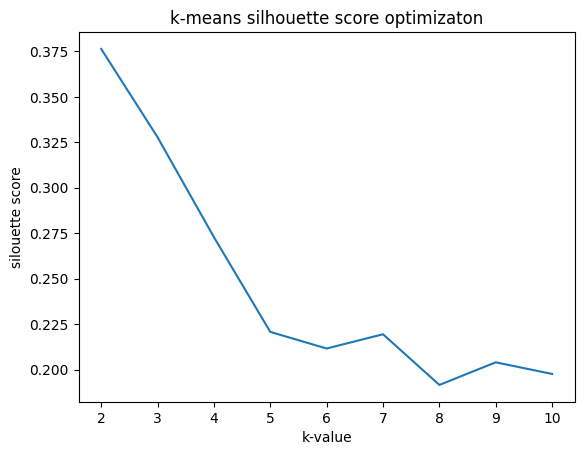

In [9]:
plt.plot(k_vals, silouette_scores)
plt.title('k-means silhouette score optimizaton')
plt.xlabel('k-value')
plt.ylabel('silouette score')

It is clear that k=2 clusters is ideal (since it has the highest average silouette score).

We can also plot the silouette widths to gain more insight. For example, the following plots the silouette scores for k=2 and k=3.

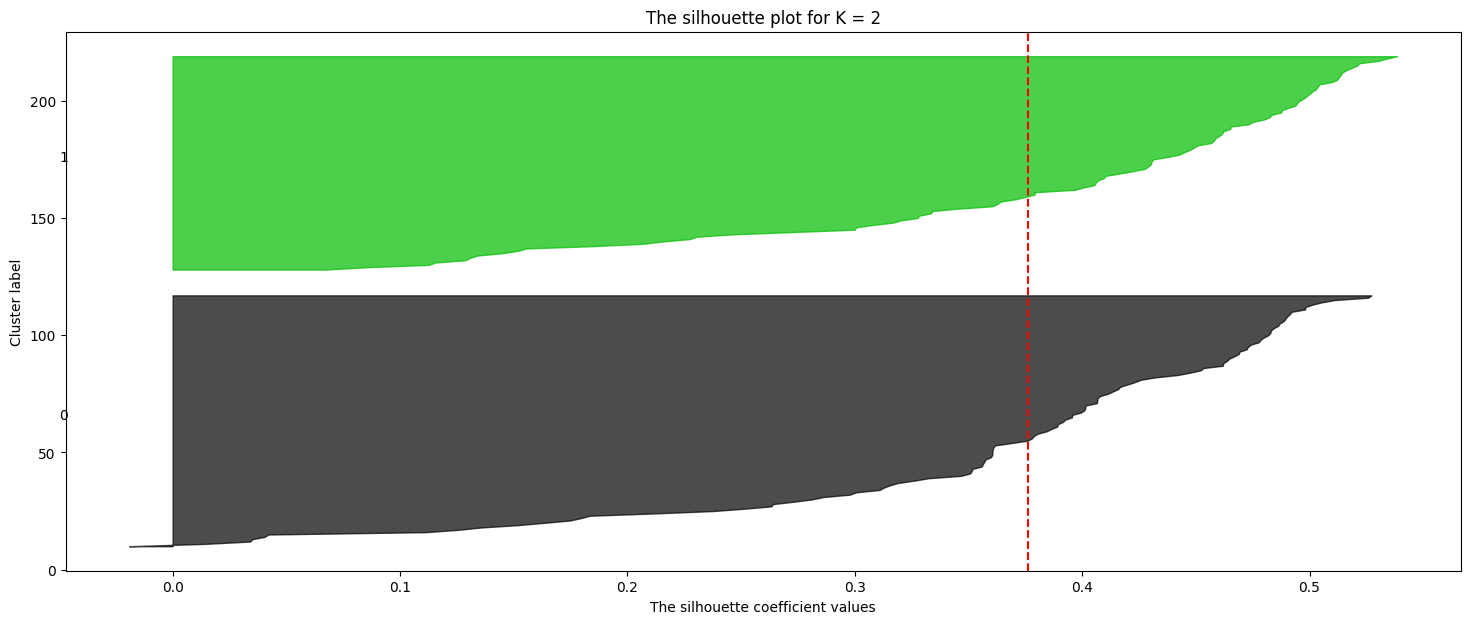

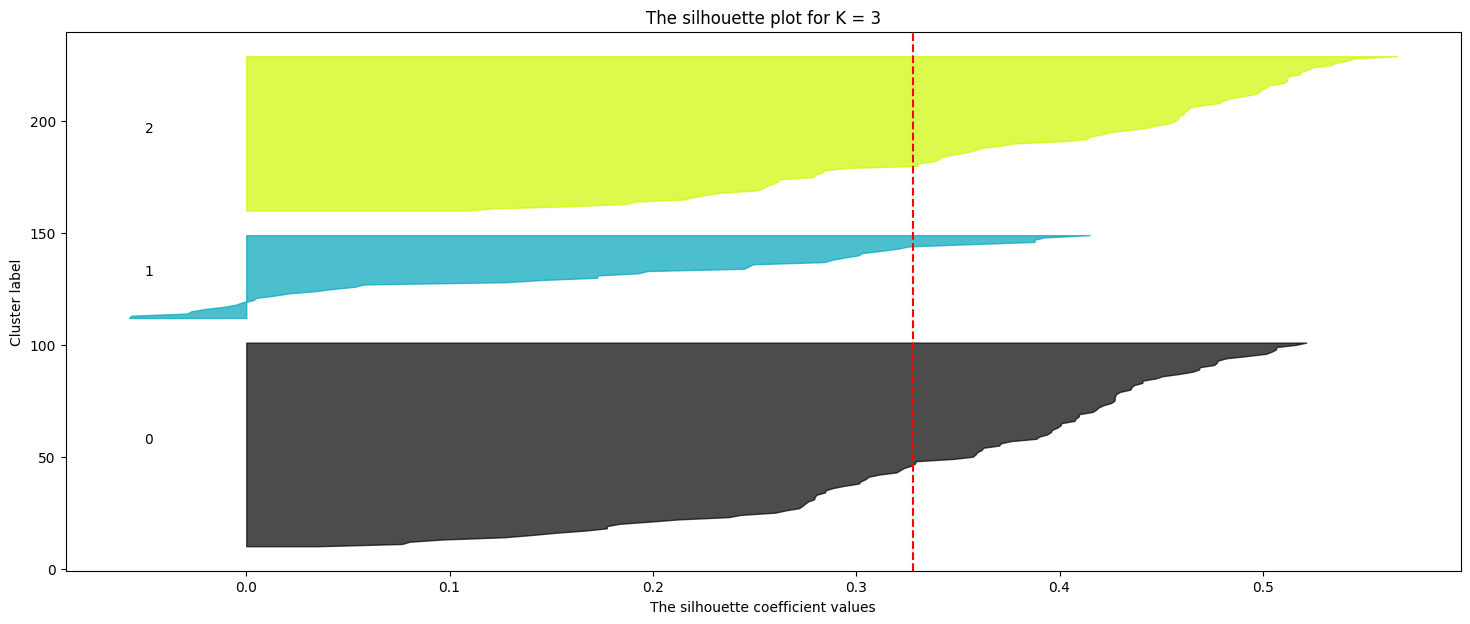

In [10]:
# Code modified from Dr. Jeganathan, lecture 22

# Defining range of clusters being tested
cluster_ranges = [2, 3]

for n_clusters in cluster_ranges:
    # Finding cluster labels associated with that cluster (would do this in a different way if more clusters present)
    cluster_labels = cluster_labels_2 if n_clusters == 2 else cluster_labels_3
    
    # Computing avg silouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    
    # Computing silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_scaled, cluster_labels)
    
    # Creating the silhouette plot
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            y = np.arange(y_lower, y_upper),
            x1 = 0,
            x2 = ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title(f"The silhouette plot for K = {n_clusters}")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.show()


Comparing these plots show that k=2 is better than k=3. The k=2 plot has slightly less fluctuation in the width of the silouette scores. This means that most of the points in the clusters are close together. In addition, cluster 1 when k=3 has more points with negative silouette values than k=2. These facts in addition to k=2 having the highest average silouette score implies that k=2 is the best number of clusters to use for this data.  

### Question 8

In [11]:
# Finding number of observations within each identified cluster
pd.Series(kmeans_2.labels_).value_counts()

0    108
1     92
Name: count, dtype: int64

This shows that there are 108 observations in cluster 0, and 92 observations in cluster 1.

### Question 9

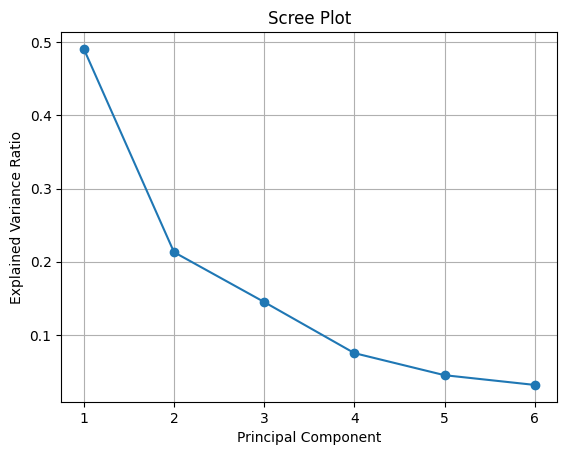

In [12]:
# Create and fit PCA model
pca = PCA()
pca.fit_transform(df_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting scree plot
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [13]:
# Calculating explained variance
for i in [1, 2, 3, 4, 5, 6]:
    total_var = round(sum(explained_variance_ratio[: i]), 2) * 100
    print(i, ' principal component(s) explains: ', total_var, '% of the variance')

1  principal component(s) explains:  49.0 % of the variance
2  principal component(s) explains:  70.0 % of the variance
3  principal component(s) explains:  85.0 % of the variance
4  principal component(s) explains:  92.0 % of the variance
5  principal component(s) explains:  97.0 % of the variance
6  principal component(s) explains:  100.0 % of the variance


Based on the scree plot, we can see that 92% of the variance is explained by principal components 1-4. So, it is best to use 4 components only. Adding a 5th component only explains 5% more of the variance, which is small enough that it can be excluded.  

### Question 10
To find which variable has the most influence on the second PC, we can look at the loadings of that component. It is easiest to visualize this in a plot.

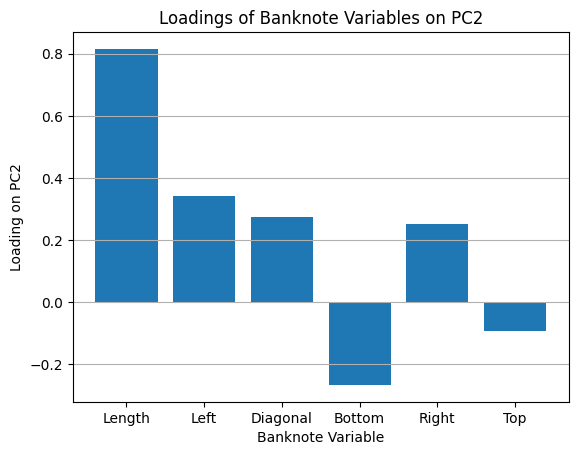

In [14]:
# Get the loadings of variables on the second principal component
loadings = pca.components_[1]

# Get the indices of the variables sorted by their absolute loadings
sorted_indices = np.argsort(np.abs(loadings))[::-1]
variable_names = df_scaled.columns.to_list()

# Plot the loadings, sorted from greatest impact to lowest impact
plt.bar(np.arange(len(variable_names)), loadings[sorted_indices])
plt.xticks(np.arange(len(variable_names)), [variable_names[i] for i in sorted_indices])
plt.xlabel('Banknote Variable')
plt.ylabel('Loading on PC2')
plt.title('Loadings of Banknote Variables on PC2')
plt.grid(True, axis='y')
plt.show()

From this plot, we can see that length of the bill has the biggest impact on PC2. We know this because the loading (which represents the correlation between the variable and the principal component) is the highest for length. Likewise, we can see that the Top margin variable has the lowest (and also negative) correlation to the PC2.

### Question 11
Based on the printed statements in Q9, the first 2 principal components explains 70% of the variance.

### Question 12

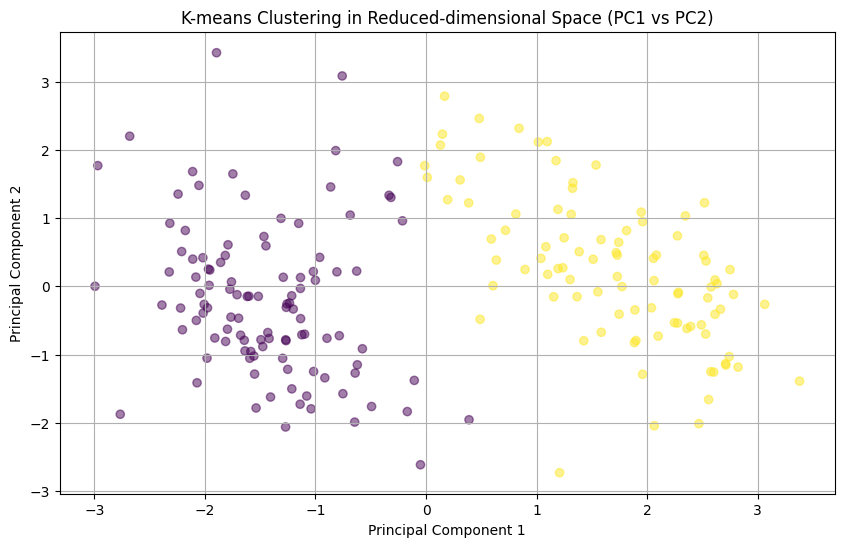

In [22]:
pca_data = pca.fit_transform(df_scaled)

# Plot the clusters in the reduced-dimensional space (PC1 vs PC2)
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_2.labels_, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering in Reduced-dimensional Space (PC1 vs PC2)')
plt.grid(True)
plt.show()

In reduced dimensional space, we can clearly see how the 2 clusters are formed when looking at the principal components.

### Question 13

In [16]:
rand_index = adjusted_rand_score(status_arr, kmeans_2.labels_)
rand_index

0.8456292321864344

The adjusted rand index of the k-means clustering and true labels is 0.84. This is quite good since an ARI of 1 would indicate perfect agreement between the clusters. An ARI of 0.84 indicates that the the k means algorithm has captured a lot of the underlying variance in the data, and can accurately label the points as such.